In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('drive/My Drive')

In [0]:
os.listdir()

In [0]:
'''
This script converts a .h5 Keras model into a Tensorflow .pb file.
Attribution: This script was adapted from https://github.com/amir-abdi/keras_to_tensorflow
MIT License
Copyright (c) 2017 bitbionic
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''

import os
import os.path as osp
import argparse

import tensorflow as tf

from keras.models import load_model
from keras import backend as K


def convertGraph( modelPath, outdir, numoutputs, prefix, name):
    '''
    Converts an HD5F file to a .pb file for use with Tensorflow.
    Args:
        modelPath (str): path to the .h5 file
           outdir (str): path to the output directory
       numoutputs (int):   
           prefix (str): the prefix of the output aliasing
             name (str):
    Returns:
        None
    '''
    
    #NOTE: If using Python > 3.2, this could be replaced with os.makedirs( name, exist_ok=True )
    if not os.path.isdir(outdir):
        os.mkdir(outdir)

    K.set_learning_phase(0)

    net_model = tf.keras.models.load_model(modelPath)

    # Alias the outputs in the model - this sometimes makes them easier to access in TF
    pred = [None]*numoutputs
    pred_node_names = [None]*numoutputs
    for i in range(numoutputs):
        pred_node_names[i] = prefix+str(i)
        pred[i] = tf.identity(net_model.output[i], name=pred_node_names[i])
    print('Output nodes names are: ', pred_node_names)
    sess = K.get_session()
    
    # Write the graph in human readable
    f = 'graph_def_for_reference.pb.ascii'
    tf.train.write_graph(sess.graph.as_graph_def(), outdir, f, as_text=True)
    print('Saved the graph definition in ascii format at: ', osp.join(outdir, f))
    
    # Write the graph in binary .pb file
    from tensorflow.python.framework import graph_util
    from tensorflow.python.framework import graph_io
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
    graph_io.write_graph(constant_graph, outdir, name, as_text=False)
    print('Saved the constant graph (ready for inference) at: ', osp.join(outdir, name))

'''
if __name__ == '__main__':

    parser = argparse.ArgumentParser()
    parser.add_argument('--model','-m', dest='model', required=True, help='REQUIRED: The HDF5 Keras model you wish to convert to .pb')
    parser.add_argument('--numout','-n', type=int, dest='num_out', required=True, help='REQUIRED: The number of outputs in the model.')
    parser.add_argument('--outdir','-o', dest='outdir', required=False, default='./', help='The directory to place the output files - default("./")')
    parser.add_argument('--prefix','-p', dest='prefix', required=False, default='k2tfout', help='The prefix for the output aliasing - default("k2tfout")')
    parser.add_argument('--name', dest='name', required=False, default='output_graph.pb', help='The name of the resulting output graph - default("output_graph.pb")')
    args = parser.parse_args()

    convertGraph( args.model, args.outdir, args.num_out, args.prefix, args.name )
'''

'\nif __name__ == \'__main__\':\n\n    parser = argparse.ArgumentParser()\n    parser.add_argument(\'--model\',\'-m\', dest=\'model\', required=True, help=\'REQUIRED: The HDF5 Keras model you wish to convert to .pb\')\n    parser.add_argument(\'--numout\',\'-n\', type=int, dest=\'num_out\', required=True, help=\'REQUIRED: The number of outputs in the model.\')\n    parser.add_argument(\'--outdir\',\'-o\', dest=\'outdir\', required=False, default=\'./\', help=\'The directory to place the output files - default("./")\')\n    parser.add_argument(\'--prefix\',\'-p\', dest=\'prefix\', required=False, default=\'k2tfout\', help=\'The prefix for the output aliasing - default("k2tfout")\')\n    parser.add_argument(\'--name\', dest=\'name\', required=False, default=\'output_graph.pb\', help=\'The name of the resulting output graph - default("output_graph.pb")\')\n    args = parser.parse_args()\n\n    convertGraph( args.model, args.outdir, args.num_out, args.prefix, args.name )\n'

In [0]:
modelPath = '/content/drive/My Drive/help_model10dB.h5'
outdir = './'
numoutputs = 1
prefix = 'output'
name = 'tf_bachao_model_10dB.pb'
convertGraph(modelPath, outdir, numoutputs, prefix, name)

AttributeError: ignored

In [0]:
print(modelPath)
!pwd
%ls


/content/drive/My Drive/help_model10dB.h5
/content/drive/My Drive
 babble/                                help_model10dB.h5
 Babble.wav                             help_model110dB.h5
 Bachao_Data_Babble_10dB/               help_model2_2.h5
 Bachao_Data_Natural_10dB/              machinery/
 Bachao_Data_Old/                       Machinery.wav
 Bachao_Data_Test/                      natural_white_noise.wav
 bachao_help_train_x_10dB.pickle        Negative_Data/
 bachao_help_train_x_noiseless.pickle   Negative_Data_10dB/
 bachao_help_train_y_10dB.pickle        Negative_Data_20dB/
 bachao_help_train_y_noiseless.pickle   Negative_Data_Natural_10dB/
 bachao_model_10dB.h5                   Negative_Data_Test_Old/
 bachao_model_noiseless.h5              test_y_extra_noise.pickle
 bachao_train_x_10dB.pickle             tf_bachao_model_10dB.pb
 bachao_train_x_noiseless.pickle        tf_bachao_model_noiseless.pb
 bachao_train_y_10dB.pickle             tf_help_bachao_model_10dB.pb
 bachao_train_y_

In [0]:
model = tf.keras.models.load_model(modelPath)

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  173056    
_________________________________________________________________
global_max_pooling1d_1 (Glob multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  257       
Total params: 173,313
Trainable params: 173,313
Non-trainable params: 0
_________________________________________________________________


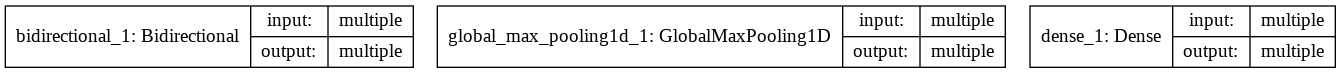

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
[n.name for n in tf.get_default_graph().as_graph_def().node][0]

In [0]:
tf.get_default_graph()